# Model Requirements

In the data folder you will find a pre-prepared tectonic uplift file and elevation file. In this notebook you can build a curve to represent the retreat and onset, or simple movements, of glaciers through time.

The three variables which users can either provide as a set elevation or as a .csv file are the Terminus, Equilibrium Line Altitude (ELA) and Ice-cap elevation. 


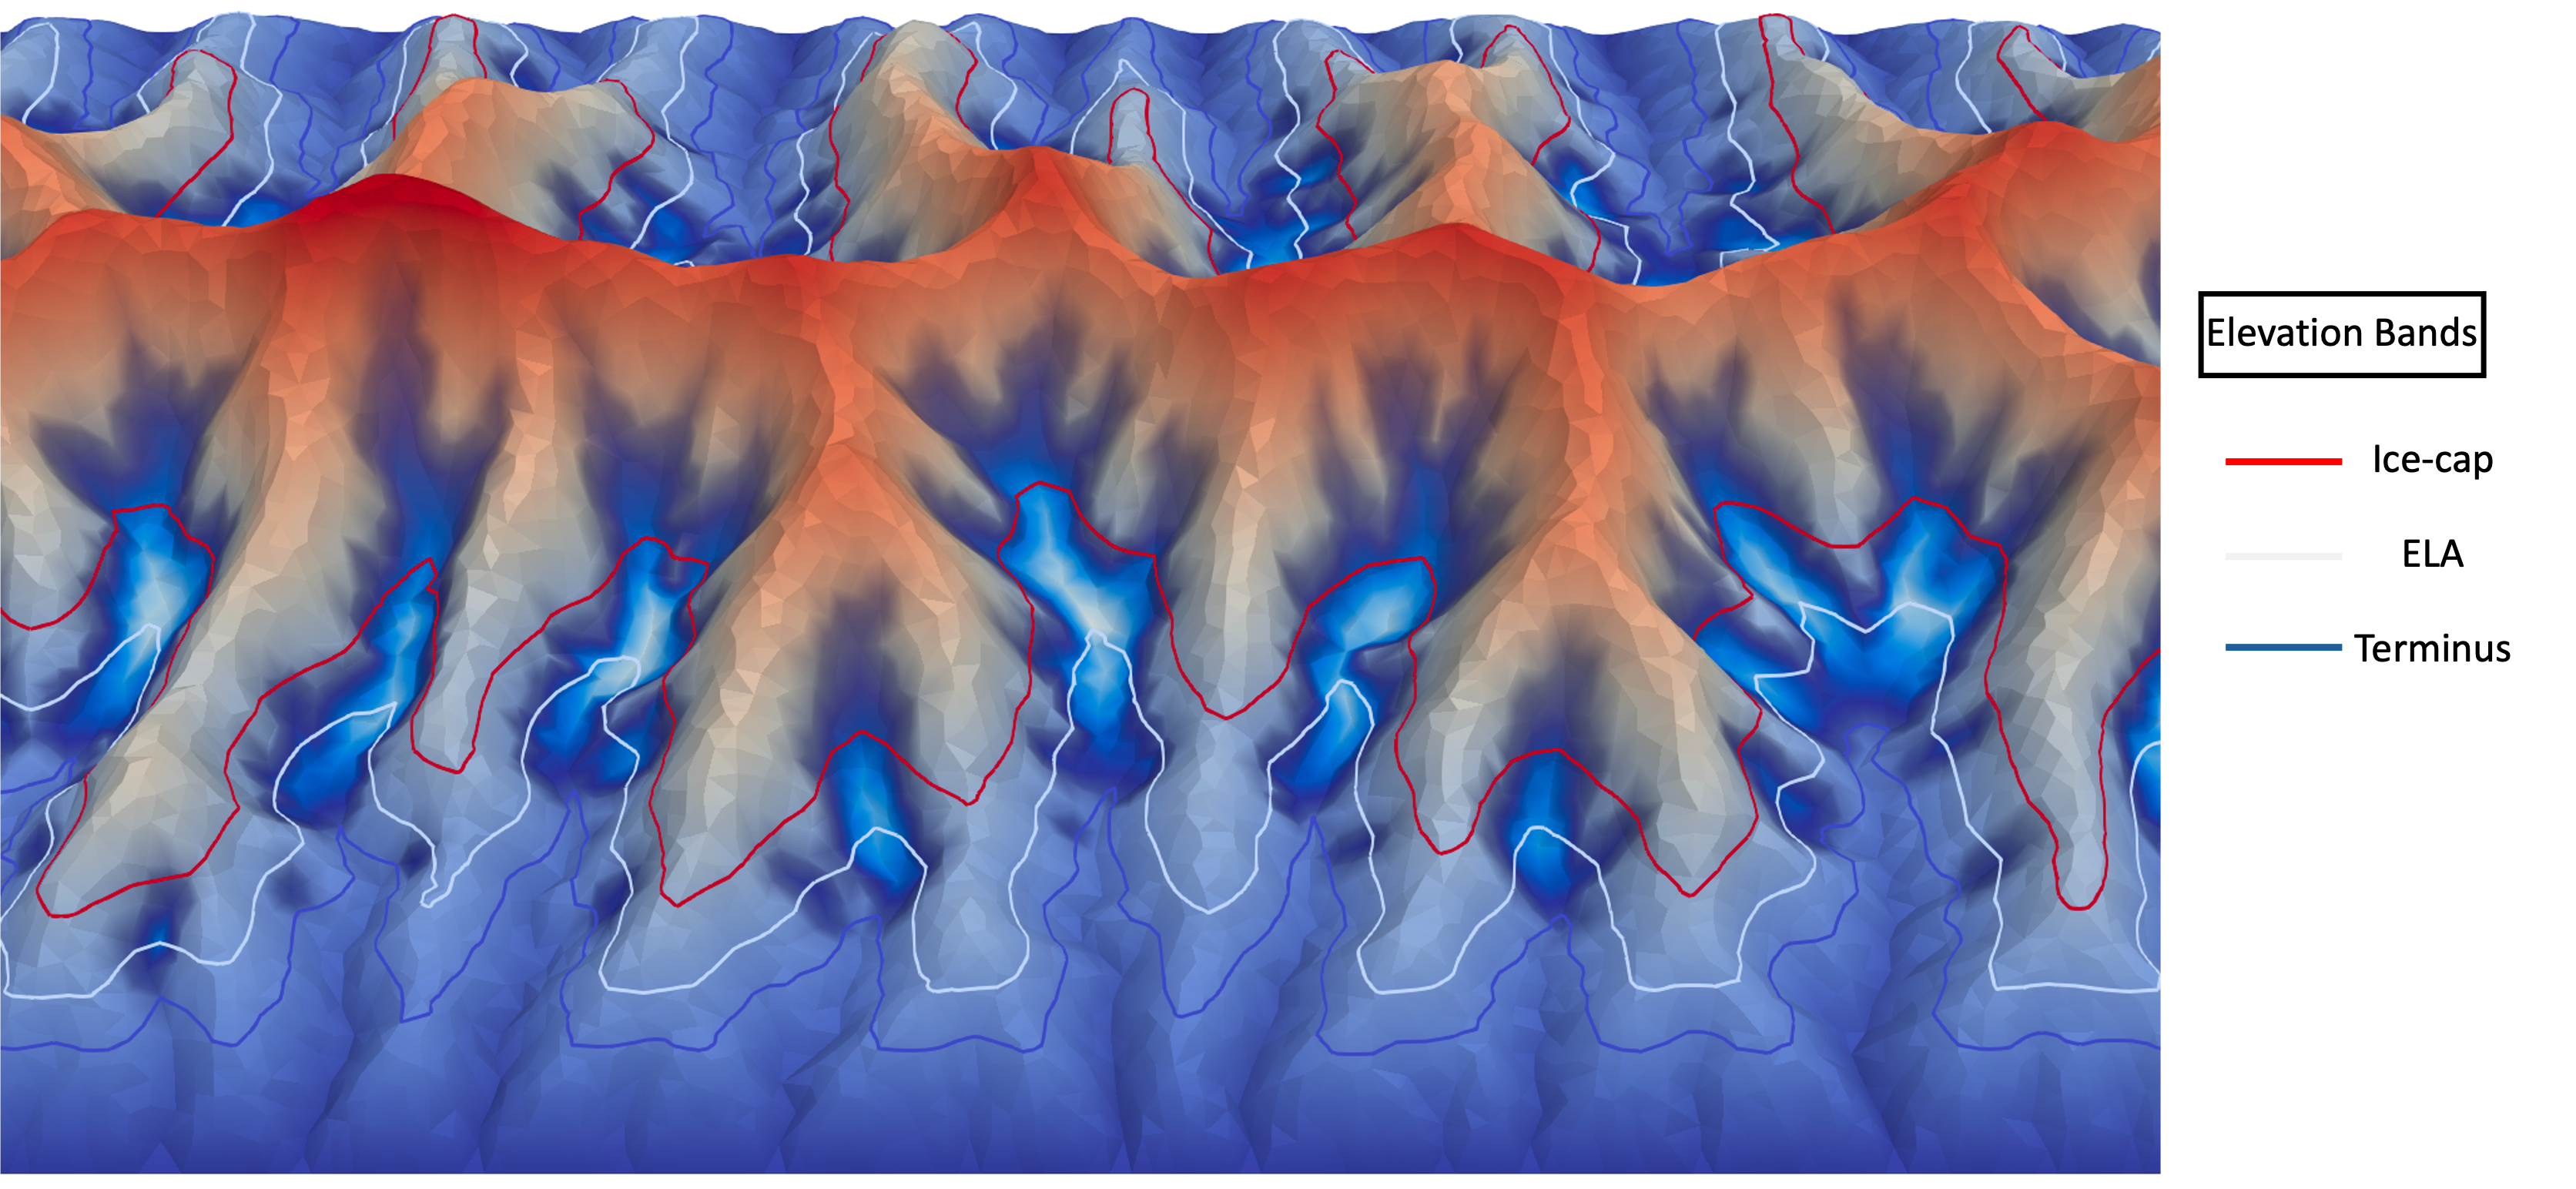


### Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Import badlands grid generation toolbox
import badlands_companion.toolGeo as simple

# Import badlands sea generation toolbox
import badlands_companion.toolSea as tools

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

import numpy as np
import pandas as pd

## Creating Glacier parameter Curves

To build the curve you need to provide the following parameters:

+ the extent of the simulation time: start/end time (in years)
+ the discretisation timestep for sampling the sea level curve (in years)
+ the averaged sea level value for starting and ending times (in metres)
+ the averaged amplitude of the sea level wave for starting and ending times (in metres)
+ the averaged period of the sea level wave for starting and ending times (in years)

With the following information a simple curve is created which interpolate linearly the averaged values of sea-level trends over the specified time period.

For further information about this function uncomment the next cell.

### Build hTerminus Curve


In [ ]:
glac = tools.toolSea()

In [ ]:
glac.buildCurve(timeExt = [0.,100000.], timeStep = 10000., seaExt = [3200.,3200.], 
                   ampExt = [1300.,1300.], periodExt = [100000.,100000.])

In [ ]:
glac.plotCurves(fsize=(6,8), figName = 'hTerminus - Elevation of termination height for glaciers')

In [ ]:
glac.exportCurve(nameCSV='data/hTerminus')

### Build hELA Curve



In [ ]:
glac.buildCurve(timeExt = [0.,100000.], timeStep = 1000., seaExt = [1150.,2750.], 
                   ampExt = [-300.,-300.], periodExt = [25000.,25000.])

In [ ]:
glac.plotCurves(fsize=(6,8), figName = 'hELA - Elevation of ELA height for glaciers')


In [ ]:
glac.exportCurve(nameCSV='data/hEla')

### Build Ice-cap Height Curve



In [ ]:
glac.buildCurve(timeExt = [0.,100000.], timeStep = 1000., seaExt = [1900.,2100.], 
                   ampExt = [-50.,-300.], periodExt = [25000.,25000.])

In [ ]:
glac.plotCurves(fsize=(6,8), figName = 'hIcecap - Elevation of Icecap minimum elevation')

In [ ]:
glac.exportCurve(nameCSV='data/hIcecap')

# Customized Curves 

Below is a series of curves with can be manipualted and eventually combined. The example provided combineds three curves of different periods, but the same amplitudes, and a baseline value of 2000 m to simulate the effects of the Milakovitch orbit cycles on climate and therefore glaciers!

### Baseline for Custom Curves

In [ ]:
glac.buildCurve(timeExt = [0.,100000.], timeStep = 1000., seaExt = [2000.,2000.], 
                   ampExt = [-0.,-0.], periodExt = [25000.,25000.])

In [ ]:
glac.plotCurves(fsize=(4,4), figName = 'Baseline Elevation for cycle')

In [ ]:
glac.exportCurve(nameCSV='data/mila_cycle_baseline')

### Milakovitch Cycle 1: 100,000 Years

In [ ]:
glac.buildCurve(timeExt = [0.,100000.], timeStep = 1000., seaExt = [0.,0.], 
                   ampExt = [150.,150.], periodExt = [100000.,100000.])

In [ ]:
glac.plotCurves(fsize=(5,7), figName = 'Curve 1 - 100,000 Year Milankovitch Cycle - Orbit Eccentricity')

In [ ]:
glac.exportCurve(nameCSV='data/mila_cycle_100k')

### Milakovitch Cycle 2: 41,000 Years

In [ ]:
0.25 * 23000

In [ ]:
glac.buildCurve(timeExt = [-10000.0,100000.], timeStep = 1000., seaExt = [0.,0.], 
                   ampExt = [150.,150.], periodExt = [41000.,41000.])

In [ ]:
glac.plotCurves(fsize=(5,7), figName = 'Curve 2 - 41,000 Year Milankovitch Cycle - Axial Tilt')

In [ ]:
glac.exportCurve(nameCSV='data/mila_cycle_41k')

### Milakovitch Cycle 3: 23,000 Years

In [ ]:
glac.buildCurve(timeExt = [-5750,100000.], timeStep = 1000., seaExt = [0.,0.], 
                   ampExt = [150.,150.], periodExt = [23000.,23000.])

In [ ]:
glac.plotCurves(fsize=(5,7), figName = 'Curve 3 - 23,000 Year Milankovitch Cycle - Precession')

In [ ]:
glac.exportCurve(nameCSV='data/mila_cycle_23k')

### Combine the curves

Note that the file will be saved in the home folder of the workspace, you may need to move it to the data file!

In [ ]:
def sum_csv_files(file_paths, output_file):
    sum_df = None
    
    for file_path in file_paths:
        df = pd.read_csv(file_path, sep=' ', header=None, names=['Time', 'Value'])
        if sum_df is None:
            sum_df = df.copy()
        else:
            sum_df['Value'] += df['Value']
    
    # Save the summed values to the output CSV file 
    # Comment the Below line to limit CSV file creation.
    sum_df.to_csv(output_file, index=False, header=False, sep=' ', float_format='%.2f')
    print(f"Summed CSV file saved to {output_file}")
    
    # Plot the summed data
    plt.plot(sum_df['Time'], sum_df['Value'], marker='o')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Summed Values Over Time')
    plt.grid(True)
    plt.show()

In [ ]:
file_paths = ['data/mila_cycle_baseline.csv', 'data/mila_cycle_100k.csv', 
              'data/mila_cycle_41k.csv', 'data/mila_cycle_23k.csv']
output_file = 'milankovitch_hTerm.csv'
sum_csv_files(file_paths, output_file)